In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

c:\Users\heqin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

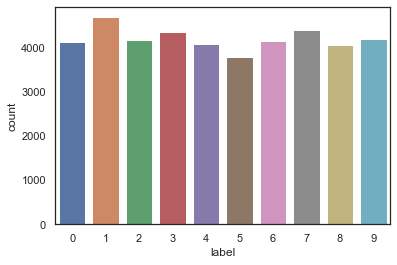

In [6]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

# Set the random seed
random_seed = 2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [17]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 50


c:\Users\heqin\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [ ]:
# Fit the model
datagen.fit(X_train)
history_simple = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)
history_aug = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

In [ ]:
# Plot the loss and accuracy curves for training and validation 
def plot_hist(history):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

In [28]:
num_sample_data = 3000
# Load the data
train = pd.read_csv("train.csv").sample(num_sample_data)
test = pd.read_csv("test.csv").sample(num_sample_data)
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

# Set the random seed
random_seed = 2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [27]:
Y_train

13027    0
21160    3
28354    6
2911     8
38600    0
        ..
5286     7
15783    2
40014    7
30388    8
8241     0
Name: label, Length: 2700, dtype: int64

In [18]:
# Fit the model
datagen.fit(X_train)
history_simple = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)
history_aug = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


Epoch 1/20
18/18 - 3s - loss: 1.8281 - accuracy: 0.3778 - val_loss: 1.1644 - val_accuracy: 0.6200 - 3s/epoch - 170ms/step
Epoch 2/20
18/18 - 2s - loss: 0.7517 - accuracy: 0.7578 - val_loss: 0.4515 - val_accuracy: 0.8900 - 2s/epoch - 107ms/step
Epoch 3/20
18/18 - 2s - loss: 0.4040 - accuracy: 0.8678 - val_loss: 0.3664 - val_accuracy: 0.8900 - 2s/epoch - 110ms/step
Epoch 4/20
18/18 - 2s - loss: 0.3708 - accuracy: 0.8889 - val_loss: 0.3267 - val_accuracy: 0.9100 - 2s/epoch - 113ms/step
Epoch 5/20
18/18 - 2s - loss: 0.2191 - accuracy: 0.9311 - val_loss: 0.3542 - val_accuracy: 0.9100 - 2s/epoch - 105ms/step
Epoch 6/20
18/18 - 2s - loss: 0.1752 - accuracy: 0.9400 - val_loss: 0.2713 - val_accuracy: 0.9200 - 2s/epoch - 103ms/step
Epoch 7/20
18/18 - 2s - loss: 0.1577 - accuracy: 0.9567 - val_loss: 0.3213 - val_accuracy: 0.9100 - 2s/epoch - 118ms/step
Epoch 8/20
18/18 - 2s - loss: 0.1399 - accuracy: 0.9567 - val_loss: 0.2883 - val_accuracy: 0.9200 - 2s/epoch - 112ms/step
Epoch 9/20
18/18 - 2s - 

C:\Users\heqin\AppData\Local\Temp/ipykernel_2988/281973051.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_aug = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


18/18 - 3s - loss: 0.5932 - accuracy: 0.8378 - val_loss: 0.2233 - val_accuracy: 0.9300 - lr: 0.0010 - 3s/epoch - 146ms/step
Epoch 2/20
18/18 - 2s - loss: 0.3754 - accuracy: 0.8878 - val_loss: 0.2181 - val_accuracy: 0.9300 - lr: 0.0010 - 2s/epoch - 107ms/step
Epoch 3/20
18/18 - 2s - loss: 0.3697 - accuracy: 0.8944 - val_loss: 0.1830 - val_accuracy: 0.9400 - lr: 0.0010 - 2s/epoch - 110ms/step
Epoch 4/20
18/18 - 2s - loss: 0.2375 - accuracy: 0.9256 - val_loss: 0.2376 - val_accuracy: 0.9500 - lr: 0.0010 - 2s/epoch - 112ms/step
Epoch 5/20
18/18 - 2s - loss: 0.2498 - accuracy: 0.9178 - val_loss: 0.1585 - val_accuracy: 0.9500 - lr: 0.0010 - 2s/epoch - 117ms/step
Epoch 6/20
18/18 - 2s - loss: 0.2782 - accuracy: 0.9156 - val_loss: 0.1485 - val_accuracy: 0.9700 - lr: 0.0010 - 2s/epoch - 122ms/step
Epoch 7/20
18/18 - 2s - loss: 0.1999 - accuracy: 0.9422 - val_loss: 0.1650 - val_accuracy: 0.9500 - lr: 0.0010 - 2s/epoch - 117ms/step
Epoch 8/20
18/18 - 2s - loss: 0.2476 - accuracy: 0.9233 - val_loss

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import tensorboard

In [11]:
%load_ext tensorboard
log_folder = 'logs'
%reload_ext tensorboard
import datetime
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [22]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 50

In [13]:
%load_ext tensorboard
log_folder = 'logs'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [30]:
from tensorflow.keras.callbacks import TensorBoard
callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]
                         

In [31]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=callbacks)

Epoch 1/10


TypeError: 'NoneType' object is not callable

In [4]:
from tensorflow.keras.utils import plot_model
import tensorboard
plot_model(model, to_file="my_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
